In [17]:
from sklearn import inspection, tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

In [4]:
## read in data

dataPath = '..\\data\\'

f = open(dataPath + "Polynomial00_X.txt", 'r')
x_data = f.readlines()
x_data = [float(x.strip()) for x in x_data]
f.close()

f = open(dataPath + "Polynomial00_Y.txt", 'r')
y_data = f.readlines()
y_data = [float(y.strip()) for y in y_data]
f.close()

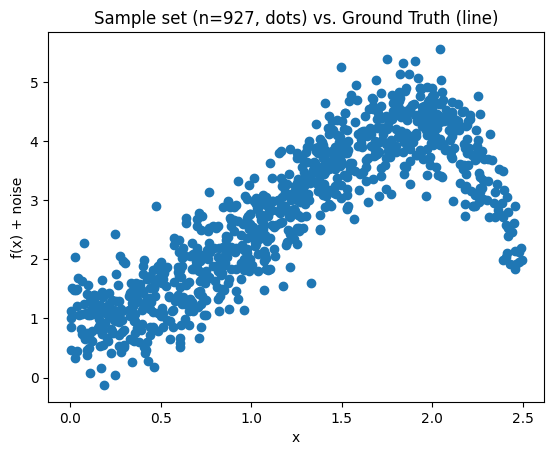

In [5]:
plt.scatter( x_data, y_data )
plt.xlabel("x")
plt.ylabel("f(x) + noise")
plt.title("Sample set (n=" + str(len(x_data)) + ", dots) vs. Ground Truth (line)")

plt.show()

In [6]:
x_train, x_test , y_train , y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=42)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

trainSize = len(x_train)
testSize = len(x_test)

(834, 1)
(834, 1)
(93, 1)
(93, 1)


In [7]:
coef = [-0.5, 1, 0.7, 0.2, 1]
quartic_name = "-0.5x^4 + x^3 + 0.7x^2 + 0.2x + 1"

x = np.linspace(0, 2.5, 100)

# TODO: replace with Horner's rule and simplify
def quartic_func(in_val, weights=coef):
    powers = np.array([4, 3, 2, 1])
    in_vals = np.array([in_val, in_val, in_val, in_val])

    out_val = np.sum( np.power(in_vals, powers) * (weights[:4]) ) + weights[-1]
    
    return out_val


def quartic_func_bulk(in_arr, weights=coef):
    y = map(quartic_func, in_arr, [weights]*len(in_arr))
    y = np.array(list(y))
    return y

In [9]:
quartic_func(2,coef)

4.199999999999999

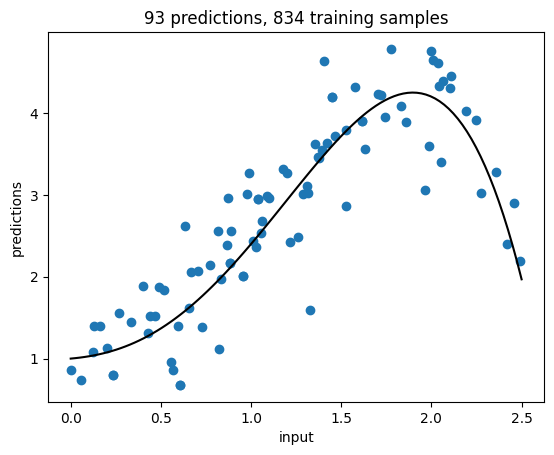

In [124]:
DtRegress = tree.DecisionTreeRegressor()
DtRegress = DtRegress.fit(x_train, y_train)

predictions = DtRegress.predict(x_test)

plt.plot( x, quartic_func_bulk(x, coef), color='black' )
plt.scatter( x_test, predictions )
plt.xlabel("input")
plt.ylabel("predictions")
plt.title(str(testSize) + " predictions, " + str(trainSize) + " training samples")

plt.show()

In [33]:
# TODO lest graph the tree, the leaves must be quite small
t = DtRegress.tree_
t.node_count
t.threshold

array([ 1.0813902 ,  0.61243966,  0.46137254,  0.24818071,  0.08922998,
       -2.        ,  0.17891818, -2.        , -2.        ,  0.32926917,
       -2.        ,  0.38202314, -2.        , -2.        , -2.        ,
        0.88101399,  0.75450754,  0.70869812, -2.        , -2.        ,
        0.81878293, -2.        , -2.        ,  0.9659164 , -2.        ,
        1.03226918, -2.        , -2.        ,  1.33439964,  1.14964688,
       -2.        ,  1.27645278,  1.20854264, -2.        , -2.        ,
       -2.        ,  2.33430409,  1.57258105,  1.44161284,  1.3905195 ,
       -2.        , -2.        ,  1.50609261, -2.        , -2.        ,
        2.17459476,  1.77266091,  1.64591241, -2.        ,  1.70600909,
       -2.        , -2.        ,  2.04707837,  1.83985889, -2.        ,
        1.8967647 , -2.        ,  1.96150869, -2.        , -2.        ,
       -2.        ,  2.2336905 , -2.        , -2.        , -2.        ])

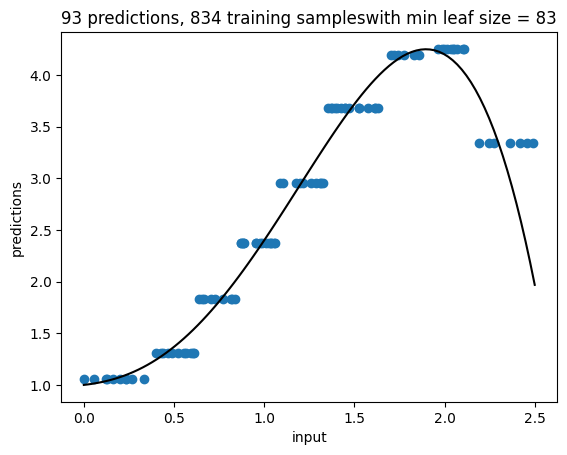

In [11]:
# try again with limits on min_samples_leaf and max_depth
min_samples_leaf = round(0.1*trainSize)

DtRegress = tree.DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
DtRegress = DtRegress.fit(x_train, y_train)

predictions = DtRegress.predict(x_test)

plt.plot( x, quartic_func_bulk(x, coef), color='black' )
plt.scatter( x_test, predictions )
plt.xlabel("input")
plt.ylabel("predictions")

title = (f'{testSize} predictions, {trainSize} training samples'
         f'with min leaf size = {min_samples_leaf}')
plt.title(title)

plt.show()

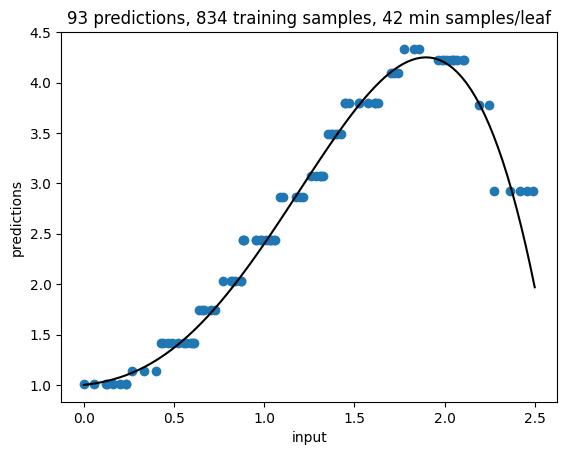

In [12]:
# try again with limits on min_samples_leaf and max_depth
min_samples_leaf = round(0.05*trainSize)

DtRegress = tree.DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
DtRegress = DtRegress.fit(x_train, y_train)

predictions = DtRegress.predict(x_test)

plt.plot( x, quartic_func_bulk(x, coef), color='black' )
plt.scatter( x_test, predictions )
plt.xlabel("input")
plt.ylabel("predictions")
plt.title(str(testSize) + " predictions, " + str(trainSize) + " training samples, "
          + str(min_samples_leaf) + " min samples/leaf")

plt.show()

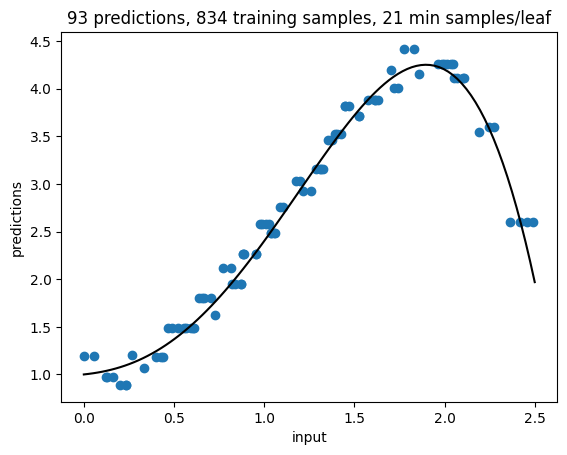

In [15]:
# try again with limits on min_samples_leaf and max_depth
min_samples_leaf = round(0.025*trainSize)

DtRegress = tree.DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
DtRegress = DtRegress.fit(x_train, y_train)

predictions = DtRegress.predict(x_test)

plt.plot( x, quartic_func_bulk(x, coef), color='black' )
plt.scatter( x_test, predictions )
plt.xlabel("input")
plt.ylabel("predictions")
plt.title(str(testSize) + " predictions, " + str(trainSize) + " training samples, "
          + str(min_samples_leaf) + " min samples/leaf")

plt.show()

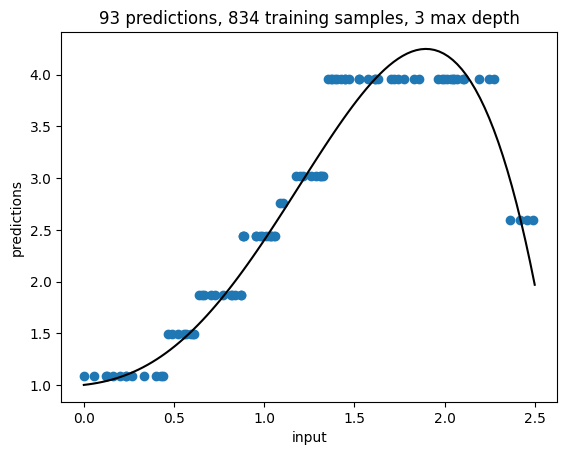

In [128]:
max_depth = 3

DtRegress = tree.DecisionTreeRegressor(max_depth=max_depth)
DtRegress = DtRegress.fit(x_train, y_train)

predictions = DtRegress.predict(x_test)

plt.plot( x, quartic_func_bulk(x, coef), color='black' )
plt.scatter( x_test, predictions )
plt.xlabel("input")
plt.ylabel("predictions")
plt.title(str(testSize) + " predictions, " + str(trainSize) + " training samples, "
          + str(max_depth) + " max depth")

plt.show()